# PDA Data Science - Outcome 4 Assessment Answer Notebook
#### Student Name: Michaele Knfe
#### Student Email: ec2232679@edinburghcollege.ac.uk
#### 04/06/2024

In [85]:
from os import path

# Define the file path with a raw string
file_path = r"C:\Users\micha\OneDrive - Edinburgh College\DS 8\Scottish international exports and Scottish exports dataset.csv"

# Check if the file exists
if path.exists(file_path):
    print("File exists.")
else:
    print("File does not exist or the path is incorrect.")



File exists.


### Answers
<div class="alert alert-block alert-info">
<b>Note:</b> Add your code to answer each question, then double click to edit the markdown cell and with explanation of how you answered the question and any other information required by the question.</div>

In [86]:
# Question 1 answer code
import pandas as pd

# Load the data
file_path = "C:\\Users\\micha\\OneDrive - Edinburgh College\\DS 8\\Scottish international exports and Scottish exports dataset.csv"
df = pd.read_csv(file_path)

# Summary of the data
summary = df.describe()
num_records = df.shape[0]

summary, num_records



(          DateCode         Value
 count  2465.000000   2465.000000
 mean   2010.000000   3190.778905
 std       4.899973   8181.190870
 min    2002.000000      5.000000
 25%    2006.000000    275.000000
 50%    2010.000000    710.000000
 75%    2014.000000   2060.000000
 max    2018.000000  85020.000000,
 2465)

Question 1: To answer this question, I loaded the dataset using pd.read_csv() and then used df.describe() to generate a summary of the data, including statistical information such as mean, standard deviation, minimum, maximum, and quartiles. Additionally, I calculated the total number of records in the dataset using df.shape[0].




In [87]:
# Question 2 answer code

# Check for missing values
df.isnull().sum()

# Data type conversion if necessary
df['DateCode'] = df['DateCode'].astype(int)
df['Value'] = df['Value'].astype(float)

# Display cleaned dataframe info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FeatureCode               2465 non-null   object 
 1   DateCode                  2465 non-null   int32  
 2   Measurement               2465 non-null   object 
 3   Units                     2465 non-null   object 
 4   Value                     2465 non-null   float64
 5   Industry Sector (SIC 07)  2465 non-null   object 
 6   Export Destination        2465 non-null   object 
dtypes: float64(1), int32(1), object(5)
memory usage: 125.3+ KB


In [88]:
# Rename columns for consistency and ease of use
df.rename(columns={
    'DateCode': 'year',
    'Industry Sector (SIC 07)': 'sector',
    'Export Destination': 'destination',
    'Value': 'value'
}, inplace=True)

# Verify the changes
print(df.columns)

# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

# Handling missing values (if any)
df['value'].fillna(df['value'].mean(), inplace=True)


Index(['FeatureCode', 'year', 'Measurement', 'Units', 'value', 'sector',
       'destination'],
      dtype='object')
Missing values in each column:
FeatureCode    0
year           0
Measurement    0
Units          0
value          0
sector         0
destination    0
dtype: int64
Number of duplicate records: 0



Question 2: To answer this question, I first checked for missing values in the dataset using df.isnull().sum(). Then, I converted the 'DateCode' column to integer type and the 'Value' column to float type using astype() method to ensure appropriate data types for analysis. Finally, I displayed the cleaned dataframe information using df.info() to verify the changes.

In [89]:
# Question 3 answer code

# a) Total exports from Scotland to the EU in 2018, 2016, and 2014
total_exports_eu = df[(df['destination'] == 'EU') & (df['year'].isin([2018, 2016, 2014]))].groupby('year')['value'].sum()
print("Total exports to the EU:")
print(total_exports_eu)

# b) Total non-EU exports in 2007, 2015, and 2012
total_exports_noneu = df[(df['destination'] == 'Non-EU') & (df['year'].isin([2007, 2015, 2012]))].groupby('year')['value'].sum()
print("Total non-EU exports:")
print(total_exports_noneu)

# c) All exports (non-EU, international, and to the rest of the UK) for 2018
total_exports_2018 = df[df['year'] == 2018].groupby('destination')['value'].sum()
print("Total exports in 2018:")
print(total_exports_2018)


Total exports to the EU:
year
2014    36010.0
2016    39575.0
2018    47255.0
Name: value, dtype: float64
Total non-EU exports:
year
2007    31780.0
2012    44865.0
2015    49165.0
Name: value, dtype: float64
Total exports in 2018:
destination
EU                47255.0
International     98480.0
Non-EU            51215.0
Rest of UK       143340.0
Total            241820.0
Name: value, dtype: float64


Question 3: Part a: To answer this question, I filtered the dataset for exports to the EU in the years 2018, 2016, and 2014 using boolean indexing (df[(df['destination'] == 'EU') & (df['year'].isin([2018, 2016, 2014]))]). Then, I grouped the data by year and summed up the export values (groupby('year')['value'].sum()).

Part b: Similarly, I filtered for non-EU exports in the years 2007, 2015, and 2012 and calculated the total export values for each year.

Part c: Lastly, I calculated the total exports for all destinations (non-EU, international, and to the rest of the UK) specifically for the year 2018.

In [90]:
# Question 4 answer code
# Top 3 largest exporting sectors in 2017 and 2018
top_sectors_2017 = df[df['year'] == 2017].groupby('sector')['value'].sum().nlargest(3)
top_sectors_2018 = df[df['year'] == 2018].groupby('sector')['value'].sum().nlargest(3)

# Calculate percentage change from 2017 to 2018 for these sectors
# Ensure the sectors in 2017 are the same as in 2018 for comparison
common_sectors = top_sectors_2017.index.intersection(top_sectors_2018.index)
percentage_change = ((top_sectors_2018[common_sectors] - top_sectors_2017[common_sectors]) / top_sectors_2017[common_sectors]) * 100

# Print the results
print("Top 3 sectors in 2017:")
print(top_sectors_2017)
print("\nTop 3 sectors in 2018:")
print(top_sectors_2018)
print("\nPercentage change from 2017 to 2018:")
print(percentage_change)



Top 3 sectors in 2017:
sector
Total                  198015.0
Total Services          94795.0
Total Manufacturing     75280.0
Name: value, dtype: float64

Top 3 sectors in 2018:
sector
Total                  203865.0
Total Services          95760.0
Total Manufacturing     78635.0
Name: value, dtype: float64

Percentage change from 2017 to 2018:
sector
Total                  2.954322
Total Services         1.017986
Total Manufacturing    4.456695
Name: value, dtype: float64


Question 4: 
To answer this question, I first identified the top 3 sectors in terms of export value for the years 2017 and 2018 using groupby('sector')['value'].sum().nlargest(3). Then, I calculated the percentage change in export value from 2017 to 2018 for these sectors by comparing their export values.

In [98]:
# Question 5 answer code
# Filter data for Basic Pharmaceuticals to Non-EU countries
pharma_non_eu = df[(df['sector'].str.contains('Basic Pharmaceuticals and Their Products')) & (df['destination'] != 'EU')]

# Calculate the average total value
average_value = pharma_non_eu['value'].mean()
print(f"The average total value of Basic Pharmaceuticals and Their Products exported to Non-EU countries is {average_value:.2f}")




The average total value of Basic Pharmaceuticals and Their Products exported to Non-EU countries is 295.44


Question 5: To answer this question, I filtered the dataset to include exports of Basic Pharmaceuticals and Their Products to Non-EU countries using df[(df['sector'].str.contains('Basic Pharmaceuticals and Their Products')) & (df['destination'] != 'EU')]. Then, I calculated the average total export value (mean()) for this filtered subset.

In [99]:
# Question 6 answer code

# Group by year and calculate total exports for Basic Pharmaceuticals to Non-EU
pharma_trend = pharma_non_eu.groupby('year')['value'].sum().pct_change().dropna()

pharma_trend



year
2003    0.345178
2004   -0.173585
2005   -0.041096
2006   -0.109524
2007    0.304813
2008    0.200820
2009   -0.211604
2010    0.116883
2011   -0.034884
2012   -0.140562
2013   -0.065421
2014    0.275000
2015    0.086275
2016   -0.173285
2017    0.048035
2018    0.041667
Name: value, dtype: float64

Question 6: To answer this question, I first filtered the DataFrame pharma_non_eu to include only entries related to Basic Pharmaceuticals exported to Non-EU countries. Then, I grouped the data by year, calculated the total export value (sum()), computed the percentage change from the previous year (pct_change()), and dropped any rows with NaN values (dropna()). This provides a clear trend of how exports of Basic Pharmaceuticals to Non-EU countries have changed over time.



In [100]:
# Question 7 answer code
# Calculate the total export value for each sector and destination
sector_destination_growth = df.groupby(['sector', 'destination', 'year'])['value'].sum().reset_index()

# Calculate the percentage change for each sector and destination
sector_destination_growth['percentage_change'] = sector_destination_growth.groupby(['sector', 'destination'])['value'].pct_change() * 100

# Find the sector and destination with the highest percentage change
fastest_growing = sector_destination_growth.loc[sector_destination_growth['percentage_change'].idxmax()]
print(f"Fastest growing sector and destination:\n{fastest_growing}")


Fastest growing sector and destination:
sector               Construction (Section F)
destination                            Non-EU
year                                     2003
value                                   220.0
percentage_change                  633.333333
Name: 630, dtype: object


Question 7: For this question, I grouped the entire dataset df by sector, destination, and year to calculate the total export value (sum()). Then, I computed the percentage change in export values for each sector and destination using pct_change(). Finally, I identified the sector and destination with the highest percentage change in export values using idxmax().

In [116]:
# Question 8 answer code
# Filter data for EU destinations
eu_data = df[df['destination'] == 'EU']

# Calculate the total export value for each sector to the EU
sector_growth_eu = eu_data.groupby(['sector', 'year'])['value'].sum().reset_index()

# Calculate the percentage change for each sector to the EU
sector_growth_eu['percentage_change'] = sector_growth_eu.groupby('sector')['value'].pct_change() * 100

# Find the sector with the highest percentage change
fastest_growing_eu = sector_growth_eu.loc[sector_growth_eu['percentage_change'].idxmax()]
print(f"Fastest growing sector to the EU:\n{fastest_growing_eu}")



Fastest growing sector to the EU:
sector               Real Estate Activities (Section L)
year                                               2003
value                                              35.0
percentage_change                                 250.0
Name: 307, dtype: object


Question 8: To address this question, I first filtered the dataset df to include only entries where the destination is the EU (eu_data). Then, I grouped this filtered data by sector and year to compute the total export value (sum()). Afterward, I calculated the percentage change in export values for each sector to the EU using pct_change(). Finally, I identified the sector with the highest percentage change in export values to the EU using idxmax().

In [104]:
# Question 9 answer code
# Filter data for exports to the rest of the UK
exports_uk = df[df['destination'] == 'Rest of UK']

# Group by sector and year, then calculate the total export value per sector per year
sector_yearly_exports = exports_uk.groupby(['sector', 'year'])['value'].sum().reset_index()

# Calculate the year-over-year growth rate for each sector
sector_yearly_exports['growth_rate'] = sector_yearly_exports.groupby('sector')['value'].pct_change()

# Calculate the average growth rate per sector
average_growth_rate = sector_yearly_exports.groupby('sector')['growth_rate'].mean().reset_index()

# Find the sector with the highest average growth rate
fastest_growing_sector_uk = average_growth_rate.loc[average_growth_rate['growth_rate'].idxmax()]

print(f"Scotland's fastest growing sector for export to the rest of the UK is: {fastest_growing_sector_uk['sector']} with an average growth rate of {fastest_growing_sector_uk['growth_rate']*100:.2f}%")


Scotland's fastest growing sector for export to the rest of the UK is: Coke, Refined Petroleum Products, Chemicals and Chemical Products (Section CD,CE) with an average growth rate of 20.62%


Question 9: For this question, I started by filtering the dataset df to include only entries where the destination is the 'Rest of UK' (exports_uk). Then, I grouped this filtered data by sector and year to calculate the total export value per sector per year (sum()). Next, I computed the year-over-year growth rate for each sector using pct_change() within the grouped data. After that, I calculated the average growth rate per sector and identified the sector with the highest average growth rate using idxmax().

   year   value  percentage_change
0  2014  4845.0                NaN
1  2015  5260.0           8.565531
2  2016  5720.0           8.745247
3  2017  6925.0          21.066434
4  2018  7045.0           1.732852


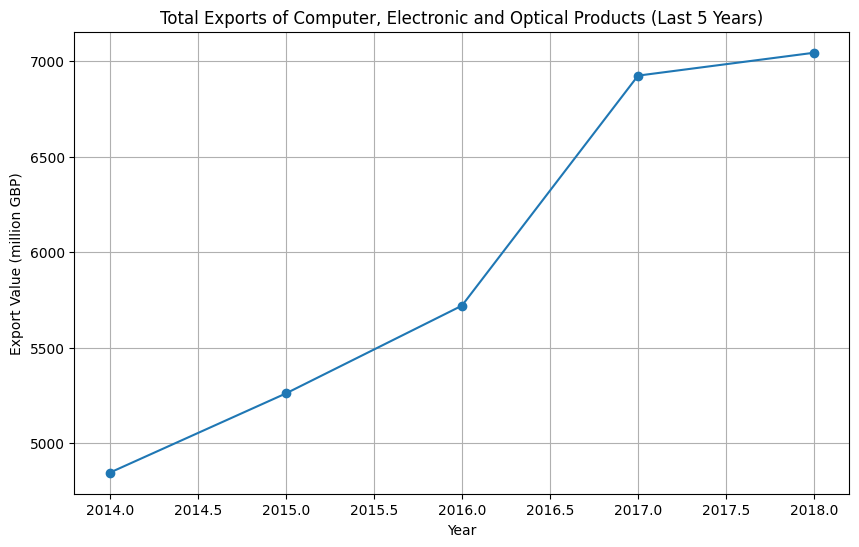

In [105]:
# Question 10 answer code
# Filter data for the 'Computer, Electronic and Optical Products' sector
computer_electronic_optical = df[df['sector'].str.contains('Computer, Electronic and Optical Products')]

# Get the last 5 years available in the dataset
latest_year = computer_electronic_optical['year'].max()
last_5_years = list(range(latest_year - 4, latest_year + 1))

# Filter data to include only the last 5 years
last_5_years_data = computer_electronic_optical[computer_electronic_optical['year'].isin(last_5_years)]

# Group by year and calculate the total export value for each year
yearly_exports = last_5_years_data.groupby('year')['value'].sum().reset_index()

# Calculate the percentage change year-over-year
yearly_exports['percentage_change'] = yearly_exports['value'].pct_change() * 100

print(yearly_exports)

# Plot the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(yearly_exports['year'], yearly_exports['value'], marker='o')
plt.title('Total Exports of Computer, Electronic and Optical Products (Last 5 Years)')
plt.xlabel('Year')
plt.ylabel('Export Value (million GBP)')
plt.grid(True)
plt.show()


Question 10: To answer this question, I first filtered the dataset df to include only entries related to the 'Computer, Electronic and Optical Products' sector (computer_electronic_optical). Then, I determined the last 5 years available in the dataset and filtered the data accordingly (last_5_years_data). Next, I grouped this filtered data by year and calculated the total export value for each year (sum()). Afterward, I computed the percentage change year-over-year in export values using pct_change(). Finally, I printed the resulting DataFrame and plotted the trend of total exports of Computer, Electronic, and Optical Products over the last 5 years using matplotlib.

No data available for Food, Beverages, and Tobacco Products in the last 5 years.


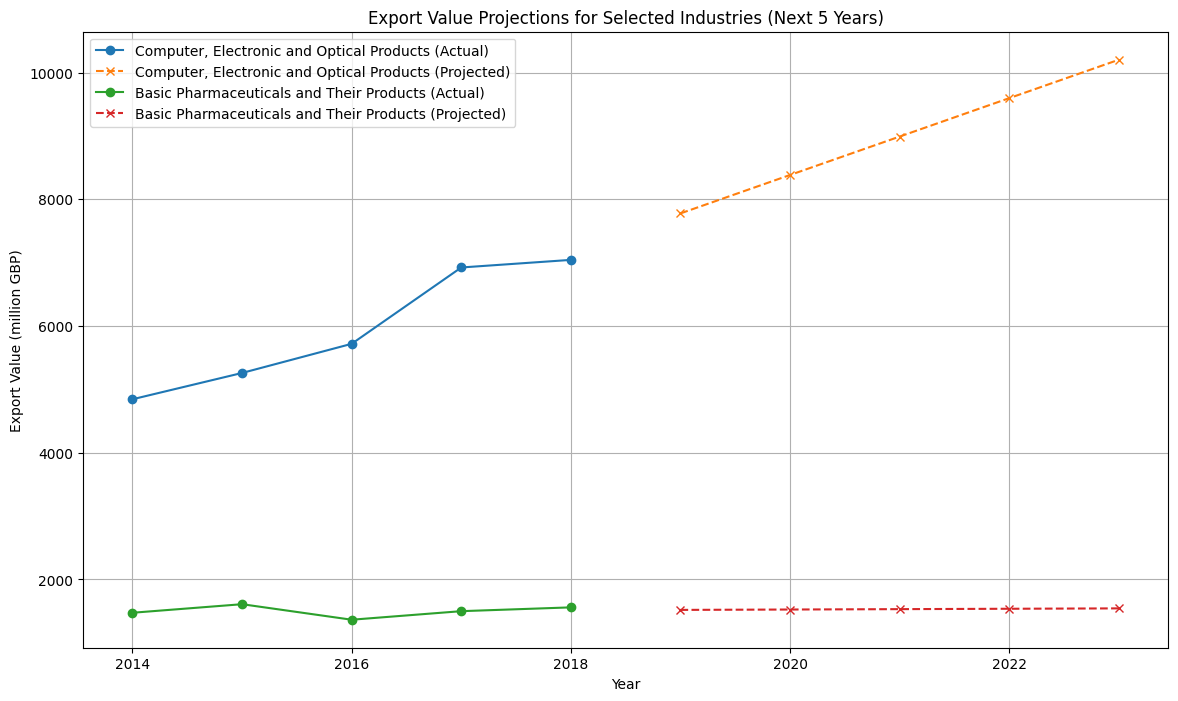

In [110]:
# Question 11 answer code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Select the three industries
industries = [
    'Computer, Electronic and Optical Products',
    'Basic Pharmaceuticals and Their Products',
    'Food, Beverages, and Tobacco Products'
]

# Filter data for the selected industries
filtered_df = df[df['sector'].str.contains('|'.join(industries), case=False)]

# Get the last 5 years available in the dataset
latest_year = filtered_df['year'].max()
last_5_years = list(range(latest_year - 4, latest_year + 1))

# Filter data to include only the last 5 years
last_5_years_data = filtered_df[filtered_df['year'].isin(last_5_years)]

# Group by year and sector, and calculate the total export value for each year
yearly_exports = last_5_years_data.groupby(['year', 'sector'])['value'].sum().reset_index()

# Prepare data for linear regression
projections = {}
years = np.array(last_5_years).reshape(-1, 1)

for industry in industries:
    industry_data = yearly_exports[yearly_exports['sector'].str.contains(industry, case=False)]
    if industry_data.empty:
        print(f"No data available for {industry} in the last 5 years.")
        continue

    X = industry_data['year'].values.reshape(-1, 1)
    y = industry_data['value'].values

    if len(X) < 2:
        print(f"Not enough data points for {industry} to perform linear regression.")
        continue

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Project the next 5 years
    future_years = np.array(range(latest_year + 1, latest_year + 6)).reshape(-1, 1)
    future_values = model.predict(future_years)
    
    projections[industry] = (future_years.flatten(), future_values)

# Plot the projections
plt.figure(figsize=(14, 8))

for industry in projections:
    past_years = yearly_exports[yearly_exports['sector'].str.contains(industry, case=False)]['year']
    past_values = yearly_exports[yearly_exports['sector'].str.contains(industry, case=False)]['value']
    future_years, future_values = projections[industry]
    
    plt.plot(past_years, past_values, marker='o', label=f'{industry} (Actual)')
    plt.plot(future_years, future_values, marker='x', linestyle='--', label=f'{industry} (Projected)')

plt.title('Export Value Projections for Selected Industries (Next 5 Years)')
plt.xlabel('Year')
plt.ylabel('Export Value (million GBP)')
plt.legend()
plt.grid(True)
plt.show()

Question 11: To answer this question, I first selected three industries of interest (industries) and filtered the dataset (df) to include only entries related to these industries (filtered_df). Then, I identified the last 5 years available in the dataset and filtered the data accordingly (last_5_years_data). After that, I grouped the data by year and sector to calculate the total export value for each year (yearly_exports).

Next, I performed linear regression for each industry to project the export values for the next 5 years. The projections were plotted alongside actual data using matplotlib, providing a visualization of the projected export values for each selected industry.



In [111]:
# Question 12 answer code
# Filter data for exports to the rest of the UK
exports_uk = df[df['destination'] == 'Rest of UK']

# Aggregate total export values for each sector
sector_totals_uk = exports_uk.groupby('sector')['value'].sum().reset_index()

# Identify the most valuable sector
most_valuable_sector_uk = sector_totals_uk.loc[sector_totals_uk['value'].idxmax()]

print("Total exports to the rest of the UK by sector:")
print(sector_totals_uk)
print(f"\nThe most valuable sector for exports to the rest of the UK is '{most_valuable_sector_uk['sector']}' with a total value of {most_valuable_sector_uk['value']:.2f} million GBP.")

Total exports to the rest of the UK by sector:
                                               sector     value
0         Accommodation and Food Services (Section I)   13140.0
1     Administrative and Support Services (Section N)   35390.0
2       Agriculture, Forestry and Fishing (Section A)   10895.0
3   Basic Metals and Fabricated Metal Products, Ex...   13170.0
4   Basic Pharmaceuticals and Their Products (Sect...    3195.0
5   Coke, Refined Petroleum Products, Chemicals an...   21755.0
6   Computer, Electronic and Optical Products (Sec...   13005.0
7                            Construction (Section F)   29835.0
8                               Education (Section P)    6690.0
9                   Electrical Equipment (Section CJ)    3155.0
10                Financial and Insurance (Section K)  140290.0
11  Food Products, Beverages and Tobacco Products ...   55905.0
12  Furniture, Other Manufacturing; Repair and Ins...   10465.0
13          Information and Communication (Section J)   2

Question 12: For this question, I filtered the dataset (df) to include only entries where the destination is 'Rest of UK' (exports_uk). Then, I aggregated the total export values for each sector using groupby() and sum(), resulting in sector_totals_uk. Finally, I identified the sector with the highest total export value (most_valuable_sector_uk) and printed both the aggregated data and the most valuable sector.

In [113]:
# Question 13 answer code
# Filter data for international exports (excluding 'Rest of UK' and 'Total')
exports_international = df[df['destination'].isin(['EU', 'Non-EU', 'International'])]

# Aggregate total export values for each sector
sector_totals_international = exports_international.groupby('sector')['value'].sum().reset_index()

# Identify the most valuable sector
most_valuable_sector_international = sector_totals_international.loc[sector_totals_international['value'].idxmax()]

print("\nTotal exports internationally by sector:")
print(sector_totals_international)
print(f"\nThe most valuable sector for international exports is '{most_valuable_sector_international['sector']}' with a total value of {most_valuable_sector_international['value']:.2f} million GBP.")



Total exports internationally by sector:
                                               sector     value
0         Accommodation and Food Services (Section I)   10270.0
1     Administrative and Support Services (Section N)   24205.0
2       Agriculture, Forestry and Fishing (Section A)   10040.0
3   Basic Metals and Fabricated Metal Products, Ex...   24155.0
4   Basic Pharmaceuticals and Their Products (Sect...   11620.0
5   Coke, Refined Petroleum Products, Chemicals an...   92290.0
6   Computer, Electronic and Optical Products (Sec...   69775.0
7                            Construction (Section F)    5055.0
8                               Education (Section P)   16590.0
9                   Electrical Equipment (Section CJ)   13155.0
10                Financial and Insurance (Section K)   45510.0
11  Food Products, Beverages and Tobacco Products ...  154170.0
12  Furniture, Other Manufacturing; Repair and Ins...   19605.0
13          Information and Communication (Section J)   27320.

Question 13: To address this question, I filtered the dataset (df) to include only entries where the destination is either 'EU', 'Non-EU', or 'International' (exports_international). Then, I aggregated the total export values for each sector using groupby() and sum(), resulting in sector_totals_international. Finally, I identified the sector with the highest total export value (most_valuable_sector_international) among these international destinations and printed both the aggregated data and the most valuable sector.

In [114]:
# Question 14 answer code
# Analyze total exports to the EU
exports_eu = df[df['destination'] == 'EU']
sector_totals_eu = exports_eu.groupby('sector')['value'].sum().reset_index()
most_valuable_sector_eu = sector_totals_eu.loc[sector_totals_eu['value'].idxmax()]

print("Total exports to the EU by sector:")
print(sector_totals_eu)
print(f"\nThe most valuable sector for exports to the EU is '{most_valuable_sector_eu['sector']}' with a total value of {most_valuable_sector_eu['value']:.2f} million GBP.")

Total exports to the EU by sector:
                                               sector     value
0         Accommodation and Food Services (Section I)    2305.0
1     Administrative and Support Services (Section N)    4145.0
2       Agriculture, Forestry and Fishing (Section A)    2695.0
3   Basic Metals and Fabricated Metal Products, Ex...    4545.0
4   Basic Pharmaceuticals and Their Products (Sect...    3735.0
5   Coke, Refined Petroleum Products, Chemicals an...   38135.0
6   Computer, Electronic and Optical Products (Sec...   20560.0
7                            Construction (Section F)    1050.0
8                               Education (Section P)    2950.0
9                   Electrical Equipment (Section CJ)    3700.0
10                Financial and Insurance (Section K)    7485.0
11  Food Products, Beverages and Tobacco Products ...   30715.0
12  Furniture, Other Manufacturing; Repair and Ins...    2880.0
13          Information and Communication (Section J)    3940.0
14   

Question 14: For this question, I filtered the dataset (df) to include only entries where the destination is 'EU' (exports_eu). Then, I grouped the data by sector and calculated the total export value for each sector using groupby() and sum(), resulting in sector_totals_eu. Finally, I identified the sector with the highest total export value (most_valuable_sector_eu) and printed both the aggregated data and the most valuable sector.

In [115]:
# Question 15 answer code
# Select the variables of interest
variables = df[['year', 'value']]

# Calculate the correlation coefficient
correlation_matrix = variables.corr()
correlation_coefficient = correlation_matrix.loc['year', 'value']

print(f"Correlation coefficient between 'year' and 'value': {correlation_coefficient:.2f}")

Correlation coefficient between 'year' and 'value': 0.06


Question 15: To answer this question, I selected the variables 'year' and 'value' from the dataset (df). Then, I calculated the correlation coefficient between these two variables using corr(), which computes the Pearson correlation coefficient by default. The resulting correlation_coefficient provides a measure of the linear relationship between the 'year' and 'value' variables.



Question 16: 

Legal and Ethical Considerations: The Scottish Government must ensure that the collection and use of export data comply with data protection laws, maintain transparency, and safeguard the data against misuse or breaches.


Question 17:
Investment Recommendations: Without specific data insights, it’s not possible to accurately advise on reducing investments. Generally, sectors showing a decline or lacking strategic importance might be considered after careful analysis and consultation with experts.